<a href="https://colab.research.google.com/github/anmolpandeybtech/Skin_Disease_Hackathon/blob/main/Skin_Disease(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d ascanipek/skin-diseases

100% 6.18G/6.18G [01:07<00:00, 50.7MB/s]
100% 6.18G/6.18G [01:07<00:00, 98.3MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-diseases.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/kaggle/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/kaggle/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 30909 files belonging to 6 classes.
Found 3928 files belonging to 6 classes.


In [8]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
966/966 [==============================] - 210s 200ms/step - loss: -6223558144.0000 - accuracy: 0.1317 - val_loss: -3612905216.0000 - val_accuracy: 0.1298
Epoch 2/10
966/966 [==============================] - 190s 194ms/step - loss: -190916116480.0000 - accuracy: 0.1317 - val_loss: -19838423040.0000 - val_accuracy: 0.1298
Epoch 3/10
966/966 [==============================] - 188s 193ms/step - loss: -1077691351040.0000 - accuracy: 0.1317 - val_loss: -2225500323840.0000 - val_accuracy: 0.1298
Epoch 4/10
966/966 [==============================] - 187s 192ms/step - loss: -3272597307392.0000 - accuracy: 0.1317 - val_loss: -3526269337600.0000 - val_accuracy: 0.1298
Epoch 5/10
966/966 [==============================] - 186s 192ms/step - loss: -7355959345152.0000 - accuracy: 0.1317 - val_loss: -6892547473408.0000 - val_accuracy: 0.1298
Epoch 6/10
966/966 [==============================] - 187s 193ms/step - loss: -13828713611264.0000 - accuracy: 0.1317 - val_loss: -17742165966848.000

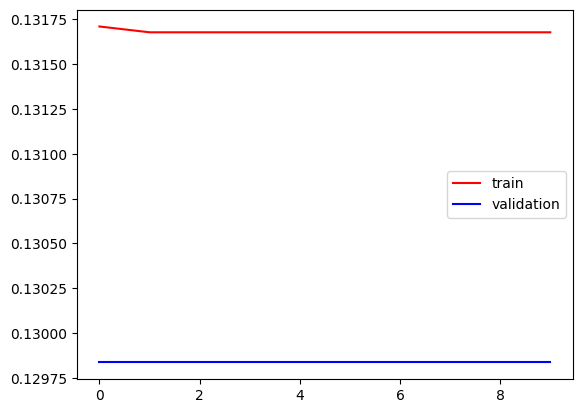

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()